<a href="https://colab.research.google.com/github/rajeevfromkrec/udacity_datascience/blob/main/Udacity_data_science_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
#pd.set_option('display.max_colwidth', -1)

#### Clone repository to get data 

In [3]:
!git clone https://github.com/rajeevfromkrec/udacity_datascience.git

Cloning into 'udacity_datascience'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [4]:
!ls

sample_data  udacity_datascience


### Unzip the file

In [5]:
!unzip udacity_datascience/data/developer_survey_2020.zip

Archive:  udacity_datascience/data/developer_survey_2020.zip
  inflating: README_2020.txt         
  inflating: so_survey_2020.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [6]:
!ls

README_2020.txt  so_survey_2020.pdf	    survey_results_schema.csv
sample_data	 survey_results_public.csv  udacity_datascience


###Load data into dataframe

In [9]:
df=pd.read_csv('survey_results_public.csv')

In [10]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

###look at the dataModel

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

### Load Schema CSV . This has details of columns 

In [12]:
schema=pd.read_csv('survey_results_schema.csv')

In [13]:
schema.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


## Which are the most popular desired tech skills among different experience Range 

####Lets first look at the number of years coding experience data

In [14]:
df=df.dropna(subset=['YearsCode'])

In [15]:
df.YearsCode.isnull().sum()

0

In [16]:
df.YearsCode.value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                      902
22                     792
Less than 1 year       757
19                     657
35                     599
23                     572
21                     550
40                     535
24                     449
26                     378
27                     335
28                     314
32                     309
38                     289
37                     258
36                     246
33                     236
3

#### Below function would convert two strings "Less than 1 year" and "More than 50 years" into numbers as we would be creating buckets for experience range

In [17]:
def map_year(x):
  if x== "Less than 1 year":
     y=0.5
  elif x== "More than 50 years":
    y=50.5
  else:
    y=x
  return y


#{"Less than 1 year":0.5,"More than 50 years": 50.5}

df.YearsCode=df.YearsCode.map(map_year)

In [22]:
df['YearsCode_float']=[ float(x) for x in df.YearsCode]

#### Below code will create a new categorical field on experience range

In [23]:
df["CodeYearsRange"]=pd.cut(df.YearsCode_float, bins=[0,1,10,20,30,40,50,60] ,labels=['0-1','1-10','10-20','20-30','30-40','40-50','50-60'])

In [24]:
df_desired_tech=df[['MiscTechDesireNextYear','CodeYearsRange','YearsCode_float']]

####drop missing values

In [25]:
df_desired_tech.dropna(subset=['MiscTechDesireNextYear'])

,MiscTechDesireNextYear,CodeYearsRange,YearsCode_float
0,.NET Core;Xamarin,30-40,36.0
1,React Native;TensorFlow;Unity 3D,1-10,7.0
4,Ansible;Chef,10-20,15.0
7,Unity 3D,10-20,17.0
9,Pandas;TensorFlow,1-10,8.0
...,...,...,...
64437,.NET;Unreal Engine,0-1,0.5
64438,.NET;Node.js;Unity 3D,0-1,0.5
64441,.NET Core;Unity 3D,1-10,7.0
64446,Flutter;Node.js;React Native;TensorFlow;Unity ...,1-10,6.0


Text(0, 0.5, 'Count')

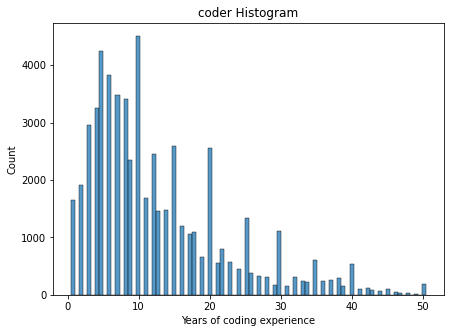

In [30]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=df_desired_tech, stat="count",
             x="YearsCode_float", kde=False,
             palette="pastel", 
             element="bars")
ax.set_title("coder Histogram")
ax.set_xlabel("Years of coding experience")
ax.set_ylabel("Count")

#### Summarize (group by) across desired technology and experience range to understand which technology are populare across which experience range

In [ ]:
df2=df_desired_tech.groupby(['CodeYearsRange','MiscTechDesireNextYear']).count().sort_values(['YearsCode_float'],ascending=False).reset_index()
#df_desired_tech.groupby(['CodeYearsRange']).count()

In [ ]:
df2.columns=(['CodeYearsRange', 'MiscTechDesireNextYear', 'Count'])

#### Select top 10

In [ ]:
df3=df2.head(10)

#### BAR plot

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

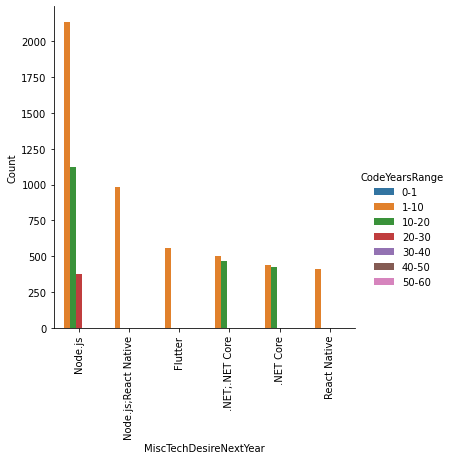

In [ ]:

sns.catplot(x="MiscTechDesireNextYear", y="Count", hue="CodeYearsRange", kind="bar", data=df3)
plt.xticks(rotation=90)
#plt.tight_layout()

### Which platform pays better in USA

In [ ]:
df_sal=df[['Country','PlatformWorkedWith','CompTotal']]

In [ ]:
df_sal.isnull().sum()

Country               0    
PlatformWorkedWith    6710 
CompTotal             22985
dtype: int64

#### Delete missing data records

In [ ]:
df_sal_cleaned=df_sal.dropna(subset=['CompTotal'])

In [ ]:
df_sal_cleaned.isnull().sum()

Country               0   
PlatformWorkedWith    2768
CompTotal             0   
dtype: int64

In [ ]:
df_sal_cleaned.dropna(subset=['PlatformWorkedWith'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_sal_cleaned.isnull().sum()

Country               0
PlatformWorkedWith    0
CompTotal             0
dtype: int64

In [ ]:
df_sal_cleaned.describe()

,CompTotal
count,3.193100e+04
mean,3.131753e+145
std,5.596207e+147
min,0.000000e+00
25%,2.000000e+04
50%,6.400000e+04
75%,1.250000e+05
max,1.000000e+150


In [ ]:
df_sal_cleaned['Country'].value_counts()

United States        7524
United Kingdom       2406
India                2347
Germany              2135
Canada               1222
                     ... 
Brunei Darussalam    1   
Guinea               1   
Yemen                1   
Belize               1   
Lesotho              1   
Name: Country, Length: 158, dtype: int64

#### Filter out USA data

In [ ]:
df_sal_cleaned_us=df_sal_cleaned[df_sal_cleaned.Country=='United States']

###Lets look at the data ..top 3 rows looks like outlier data


In [ ]:
df_sal_cleaned_us.sort_values(['CompTotal'],ascending=False)

,Country,PlatformWorkedWith,CompTotal
2488,United States,Windows,1.000000e+15
9802,United States,Android;Google Cloud Platform;IBM Cloud or Watson;iOS;Linux;MacOS;Windows,5.000000e+09
41925,United States,Docker;Linux;Windows,2.500000e+06
61373,United States,Docker;Linux;Microsoft Azure;Raspberry Pi;Windows,1.560000e+06
57924,United States,Linux,1.500000e+06
...,...,...,...
31513,United States,AWS;Docker;Linux;MacOS;Windows;WordPress,0.000000e+00
51082,United States,Docker,0.000000e+00
19596,United States,AWS;Docker;Linux;Microsoft Azure;Windows,0.000000e+00
3842,United States,Linux,0.000000e+00


In [ ]:
df_sal_cleaned_us1=df_sal_cleaned_us.sort_values(['CompTotal'],ascending=False)

### This would remove top 3 rows

In [ ]:
df_sal_cleaned_us1=df_sal_cleaned_us1[3:]

#### Calculate average salary across plaotform

In [ ]:
df4=df_sal_cleaned_us1.groupby(['PlatformWorkedWith','Country']).mean().sort_values(['CompTotal'],ascending=False).reset_index().head(5)

In [ ]:
df4.head()

,PlatformWorkedWith,Country,CompTotal
0,Android;Google Cloud Platform;iOS;MacOS,United States,800000.000000
1,Android;Arduino;AWS;Docker;Google Cloud Platform;IBM Cloud or Watson;iOS;Kubernetes;Linux;MacOS;Raspberry Pi;Slack Apps and Integrations;Windows,United States,750000.000000
2,Android;Docker;Heroku;Kubernetes;Linux;MacOS;Microsoft Azure;Raspberry Pi,United States,650000.000000
3,Android;Arduino;AWS;Docker;Google Cloud Platform;Heroku;iOS;Kubernetes;Linux;MacOS;Microsoft Azure;Raspberry Pi;Slack Apps and Integrations;Windows,United States,580000.000000
4,Docker;Linux;Microsoft Azure;Raspberry Pi;Windows,United States,578333.333333


#### Plot Bar plot for top 5

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


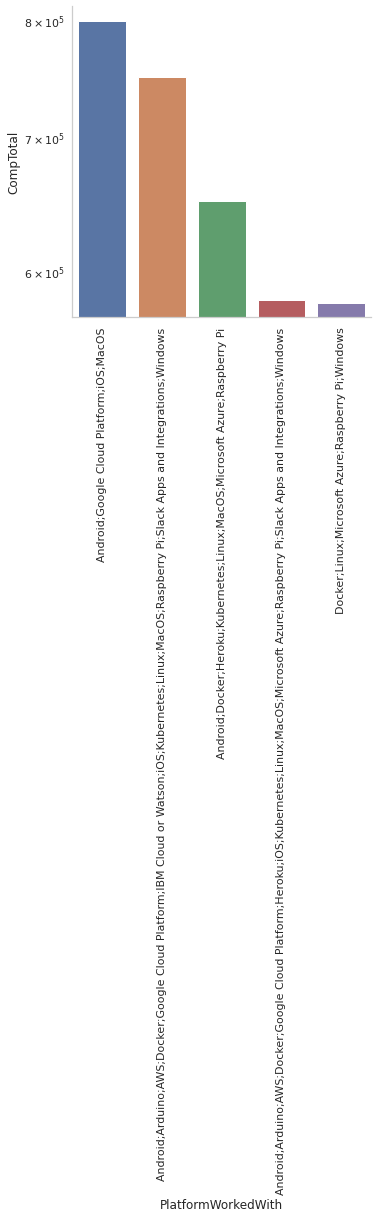

In [ ]:
sns.set(style="whitegrid")
g=sns.catplot(x="PlatformWorkedWith", y="CompTotal", kind="bar", data=df4)
g.fig.get_axes()[0].set_yscale('log')
plt.xticks(rotation=90)
plt.show()

### Does the company size has impact on the salary range 


In [ ]:
df_comp_size=df[['OrgSize','ConvertedComp']]

In [ ]:
df_comp_size.isnull().sum()

OrgSize          13654
ConvertedComp    23054
dtype: int64

#### Delete missing data

In [ ]:
df_comp_size.dropna(subset=['ConvertedComp','OrgSize'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_comp_size.isnull().sum()

OrgSize          0
ConvertedComp    0
dtype: int64

#### Calculate avareage salary across orgsize

In [ ]:
df5=df_comp_size.groupby('OrgSize').mean().sort_values(['ConvertedComp'],ascending=False).reset_index()

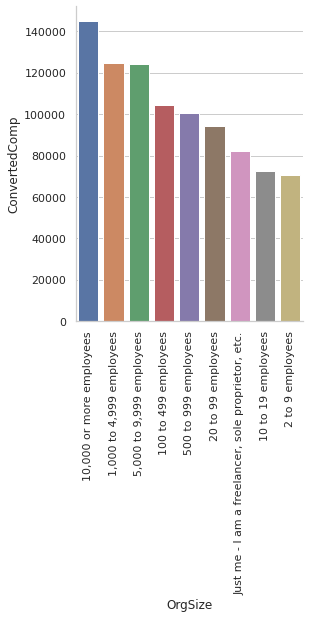

In [ ]:
sns.set(style="whitegrid")
g=sns.catplot(x="OrgSize", y="ConvertedComp", kind="bar", data=df5)
plt.xticks(rotation=90)
plt.show()